In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Downloads/beer.txt', ' ')
df.head()

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77


In [3]:
df.shape

(20, 5)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
calories,20.0,132.5500,30.283702,68.00,110.2500,144.000,150.250,175.00
sodium,20.0,14.9500,6.581273,6.00,9.5000,15.000,19.000,27.00
alcohol,20.0,4.2400,1.087924,0.90,4.1750,4.600,4.900,5.50
cost,20.0,0.4945,0.144858,0.28,0.4275,0.435,0.485,0.79


In [5]:
df.columns

Index(['name', 'calories', 'sodium', 'alcohol', 'cost'], dtype='object')

In [6]:
df.isnull().sum()

name        0
calories    0
sodium      0
alcohol     0
cost        0
dtype: int64

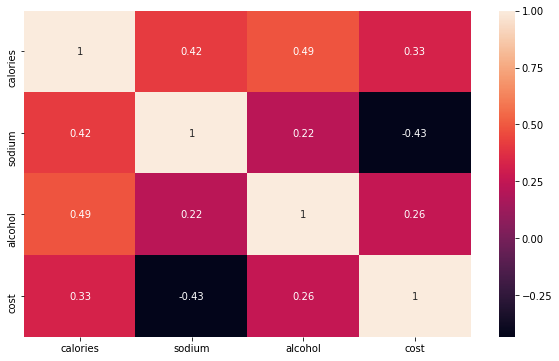

In [7]:
plt.figure(figsize=(10,6)) 
sns.heatmap(df.corr(), annot=True)

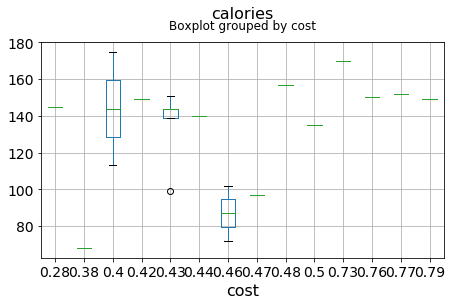

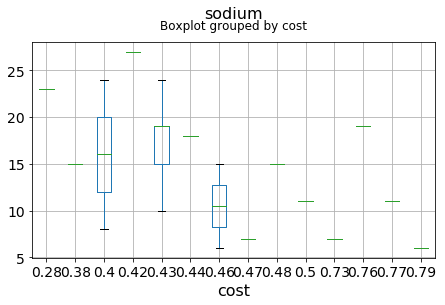

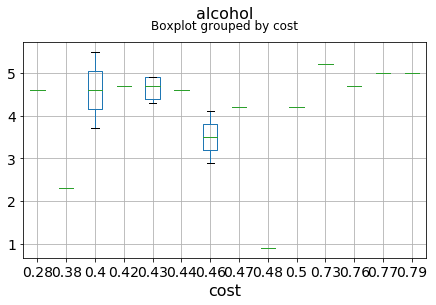

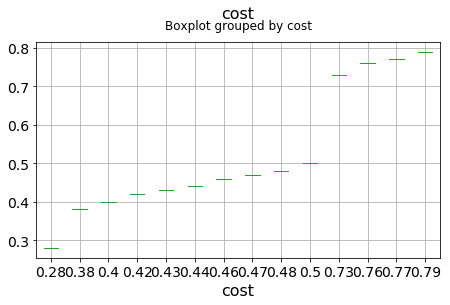

In [8]:
for c in df.columns[1:]:
    df.boxplot(c,by='cost',figsize=(7,4),fontsize=14)
    plt.title("{}\n".format(c),fontsize=16)
    plt.xlabel("cost", fontsize=16)

In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [10]:
le = preprocessing.LabelEncoder()

In [11]:
df.name = le.fit_transform(df.name)

In [12]:
df1 = df

In [13]:
df1.head()

,name,calories,sodium,alcohol,cost
0,2,144,15,4.7,0.43
1,17,151,19,4.9,0.43
2,11,157,15,0.9,0.48
3,10,170,7,5.2,0.73
4,8,152,11,5.0,0.77


In [16]:
x = df1.drop('cost',axis=1)
y = df1['cost']

In [17]:
from sklearn import model_selection

In [18]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2, random_state=0) #80/20 split

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
reg = LinearRegression()

In [28]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
print(reg.intercept_)

0.31433172794548725


In [30]:
reg.coef_

array([ 0.00159531,  0.00223902, -0.01611935,  0.02939081])

In [31]:
prediction = reg.predict(x)

prediction

array([0.53628763, 0.51729121, 0.4680676 , 0.75091486, 0.63706632,
       0.4257765 , 0.48094507, 0.38117081, 0.52192065, 0.55191801,
       0.47922504, 0.42940028, 0.58187159, 0.48364902, 0.71254134,
       0.31791861, 0.45817913, 0.40506818, 0.48798804, 0.57083816])

In [32]:
import statsmodels as sm

import statsmodels.formula.api as smf

In [34]:
model = smf.ols('y~x',df1)

model

In [35]:
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     4.033
Date:                Tue, 12 May 2020   Prob (F-statistic):             0.0205
Time:                        01:34:48   Log-Likelihood:                 18.076
No. Observations:                  20   AIC:                            -26.15
Df Residuals:                      15   BIC:                            -21.17
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3199      0.161      1.987      0.0